# Booststraping

### Instead of training KNN regressor with entire training data, multiple samples of training data are used. This is highly used for constructing hypothesis test. This gives the most optimal value of K

Below tasks are carried out -

i.   Implementing a bootstraping function(also includes KNN funtion)

ii.  Error plots with sample size and number of samples remaining constant and changing k value.

iii. Report on above research

iv.  Error plots with sample size and k remaining constant and changing the number of samples.

v.   Report on above research

In [16]:
# importing required libraries
library(ggplot2)
library(reshape2)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"

In [2]:
# loading training data and testing data 
train = read.csv(file='Task1B_train.csv')
test = read.csv(file='Task1B_test.csv')
head(train)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


In [5]:
# scaling the data to reduce the cell values to make it analysis feasible
train = scale(train) 
test = scale(test)
head(train)
head(test)
dim(train) # dimensions of training data

x1,x2,x3,x4,y
-1.729259,-0.8314871,-1.0209430,-0.7844105,-1.148323
-1.725536,-0.8520287,-1.0206420,-0.8790979,-1.143610
-1.721813,-0.8412684,-1.0158255,-0.8702858,-1.106215
-1.718090,-0.8296399,-1.0180531,-0.8505881,-1.102936
-1.714368,-0.8252803,-1.0092629,-0.8168945,-1.079782
-1.710645,-0.8138550,-0.9934286,-0.8068729,-1.057242


x1,x2,x3,x4,y
-1.729259,-0.8447954,-1.0144788,-0.8216982,-1.131671
-1.725536,-0.8379815,-1.0171199,-0.8945270,-1.121240
-1.721813,-0.8475725,-1.0246229,-0.8838775,-1.124921
-1.718090,-0.8203904,-1.0054151,-0.8098463,-1.082381
-1.714368,-0.8151305,-0.9977921,-0.8151711,-1.093630
-1.710645,-0.8220640,-0.9892686,-0.8131099,-1.032887


[1] 930   5

In [6]:
# Spliting the X variables and Y variables
# here first 4 columns are X variables and last is the Y variable (required to be predicted)
train.data = train[,-5]
train.y = train[,5]
test.data = test[,-5]
test.y = test[,5]

head(train.data)
head(test.data)
head(train.y)

x1,x2,x3,x4
-1.729259,-0.8314871,-1.0209430,-0.7844105
-1.725536,-0.8520287,-1.0206420,-0.8790979
-1.721813,-0.8412684,-1.0158255,-0.8702858
-1.718090,-0.8296399,-1.0180531,-0.8505881
-1.714368,-0.8252803,-1.0092629,-0.8168945
-1.710645,-0.8138550,-0.9934286,-0.8068729


x1,x2,x3,x4
-1.729259,-0.8447954,-1.0144788,-0.8216982
-1.725536,-0.8379815,-1.0171199,-0.8945270
-1.721813,-0.8475725,-1.0246229,-0.8838775
-1.718090,-0.8203904,-1.0054151,-0.8098463
-1.714368,-0.8151305,-0.9977921,-0.8151711
-1.710645,-0.8220640,-0.9892686,-0.8131099


[1] -1.148323 -1.143610 -1.106215 -1.102936 -1.079782 -1.057242

#### Implementing KNN function with default k=3

In [7]:
# average function to calculate the average of the nearest neighbours.
average = function(train.label){
    ## get the average of all the samples
    return(mean(train.label))
}


# KNN function
knn <- function(train.data, train.label, test.data, K=3){
    
    ## number of train samples
    train.len = nrow(train.data)
    
    ## number of test samples
    test.len = nrow(test.data)
    
    ## distances between samples using method euclidean
    dist = as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample
    for (i in 1:test.len){
        
        ### fetching K nearest neighbours of test sample from training sampels
        nn = as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### Average of these nearest neighbours is obatined using the average function
        test.y[i] = (average(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.y)
    
}

### i. Implementing bootstrap function
This function creates the sampel of indices that can be used to create samples from training data.

In [8]:
bootstrap = function(dataset.size,required.size=30,datasets=100){
    
    # matrix with number of rows as number of data sets(samples) and columns as number of samples for each data set
    indices = matrix(nrow = datasets,ncol = required.size)
    
    # for each data set i.e for each row of a matrix
    for (i in 1:datasets){
        
        # filling row with random sample number not more than training data size which are used as indices.
        indices[i,] = sample(dataset.size,size=required.size,replace=TRUE)
        }
    
    # retuen the index matrix
    return(indices)
}

### ii . Ploting graphs for k vs MSE with constant sample size and samples and changing k


In [13]:
max.k = 20 # maximum value of k
times= 100 #number of samples
size = 30 # size of each sample

# get the indices for each sample. bootstrap function is used
boot.index = bootstrap(nrow(train.data),30,100)

# dataframe to store the errors
MSE1 = data.frame('K' = 1,'times'=1,'mse' = rep(0,max.k*times))

#test data length
test.len = length(test.y)

# for each k
for (k in 1:max.k){
    
    # for each sample for that k
    for (t in 1:times){
        
        i = (k-1)*times+t # row number from MSE1 dataframe to update the error
        MSE1[i,1] = k
        MSE1[i,2] = t
        
        # index for the sample 't'
        indices = boot.index[t,]
        
        # this sample is used to train the data and test against test data provided and MSE is calculated.
        MSE1[i,3] = sum((knn(train.data[indices,], train.y[indices], test.data,k) - test.y)^2)/test.len        
    }
}
# code takes around 5 min to run

In [14]:
head(MSE1)
tail(MSE1)

K,times,mse
1,1,0.01914089
1,2,0.01987607
1,3,0.02680361
1,4,0.01963969
1,5,0.04829333
1,6,0.02111452


,K,times,mse
1995,20,95,0.6145469
1996,20,96,0.5674347
1997,20,97,0.2955652
1998,20,98,0.7893100
1999,20,99,0.6480705
2000,20,100,0.4789711


#### Visualisations : MSE vs K plot

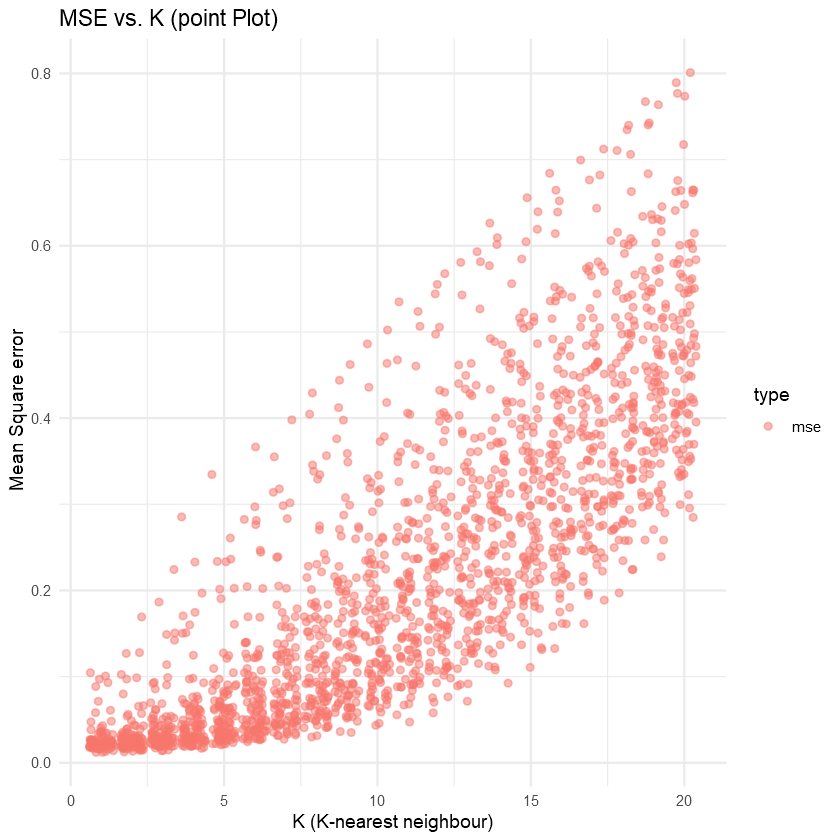

In [17]:
melt.mse1 <- melt(MSE1, id=c('K', 'times')) # reshape for visualization
names(melt.mse1) <- c('K', 'times', 'type', 'mse')

#point plot
ggplot(data=melt.mse1, aes(K, mse,color = type)) + geom_jitter(alpha=0.5)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('MSE vs. K (point Plot)') + theme_minimal() +
    xlab('K (K-nearest neighbour)') + ylab('Mean Square error') 

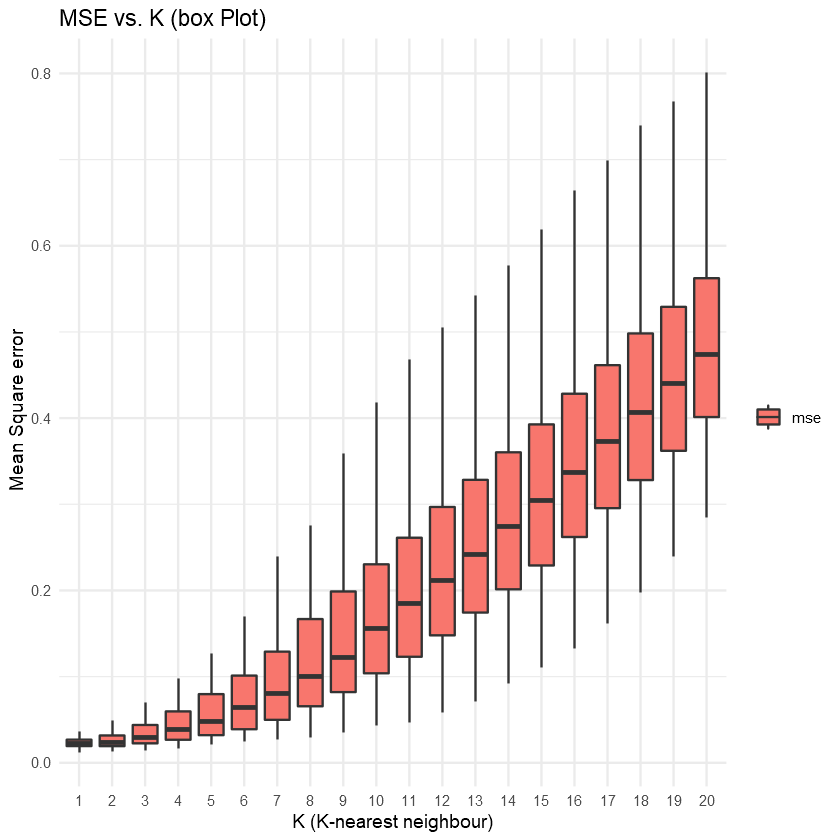

In [25]:
#box plot
ggplot(data=melt.mse1, aes(factor(K), mse,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('MSE vs. K (box Plot)') + theme_minimal()+
    xlab('K (K-nearest neighbour)') + ylab('Mean Square error') 

### iii. report
As K increases the certainity of the MSE increases. The increase in IQR exlpains this.

### iv. Ploting graphs for number of samples and error by keeping sample size and k value constant

In [19]:
k = 10 # constant
times.max= 100 # maximum number of samples 
multiple = 10 # numer of samples are in multiples of 10  
size = 30 # sample size

# data frame to store the errors for each sampel
MSE2 = data.frame('t' = 1,'times'=10,'mse' = rep(0,times))

i = 1 # to caluculate the row of MSE2 to enter the error

#test data length
test.len = length(test.y)

for (t in 1:(times.max/multiple)){ #multiples of 10
    
    # get the indices for the t*10 samples
    boot.index = bootstrap(nrow(train.data),30,t*multiple)
    

    
    # for each sample
    for (l in 1:nrow(boot.index)){
        i= (t-1)*multiple+l
        
        MSE2[i,1] = l
        MSE2[i,2] = t*multiple 
        
        # get the index of the training data 
        indices = boot.index[l,]
        
        # calculating MSE for the test data using prediction of KNN
        MSE2[i,3] = sum((knn(train.data[indices,], train.y[indices], test.data,k) - test.y)^2)/test.len
        
        }
}
# code might take around 5 minutes to compile

In [21]:
head(MSE2)

t,times,mse
1,10,0.26342860
2,10,0.12391179
3,10,0.20201345
4,10,0.19249616
5,10,0.12907537
6,10,0.08900465


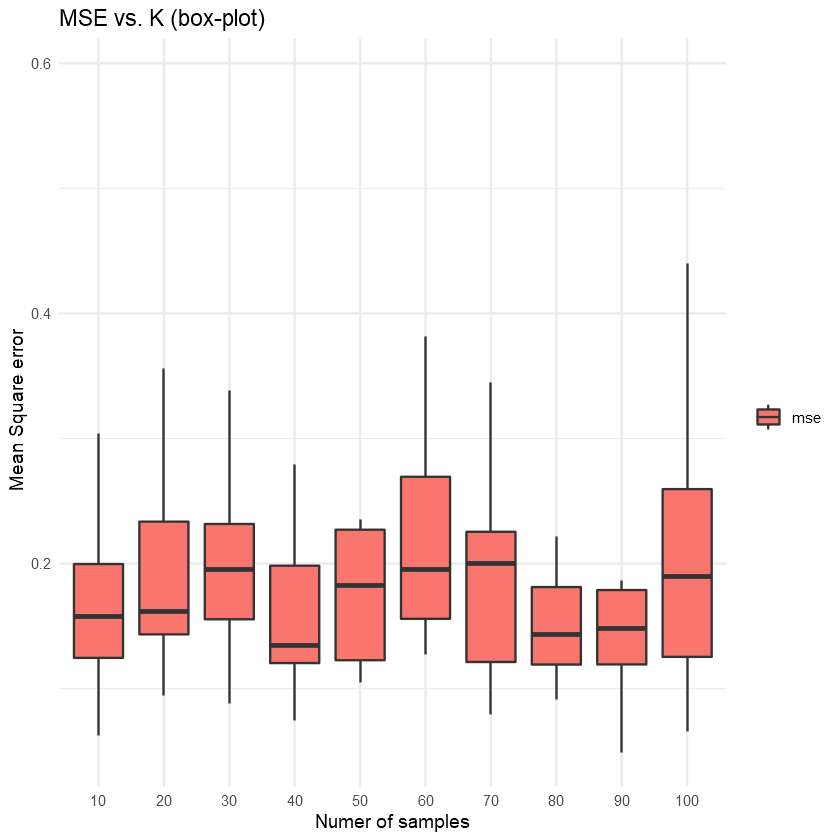

In [27]:
melt.mse2 <- melt(MSE2, id=c('t', 'times')) # reshape for visualization
names(melt.mse2) <- c('t', 'times', 'type', 'mse')

# samples vs MSE (boxplot)
ggplot(data=melt.mse2, aes(factor(times), mse,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('MSE vs. K (box-plot)') + theme_minimal() +
     xlab('Numer of samples') + ylab('Mean Square error') 

### v. Report 
As the number of samples increases, the uncertainity seems to be increasing very slowing. So it is always recommended to have large sample size as possible